# Introduction
    
    Content:
    
1.  [Loading Data](#1)

1.  [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)

1.  [Basic Data Analysis](#6)

1.  [Outlier Detection](#7)

1.  [Missing Values](#8)
    * [Finding Missing Values](#9)
    * [Filling Missing Values In](#10)

1.  [Visualization](#11)
    * [Correlation](#12)
    * ["SibSp" and "Survived"](#13)
    * ["ParCh" and "Survived"](#14)
    * ["PClass" and "Survived"](#15)
    * ["Age" and "Survived"](#16)
    * ["PClass", "Age" and "Survived"](#17)
    * ["Embarked", "PClass" and "Survived"](#18)
    * ["Embarked", "Sex", "Fare" and "Survived"](#19)
1.  [Filling Missing Age Values](#20)
1.  [Feature Engineering](#21)
    *  [Name and Title](#22)
    *  [Family Size](#23)
    *  [Embarked](#24)
    *  [Ticket](#25)
    *  [Pclass](#26)
    *  [Sex](#27)
    * [Dropping Passenger ID & Cabin](#28)
1. [Modelling](29)
    *  [Train Test Split](#30)
    *  [Simple Logistic Regression](#31)
    *  [Hyperparameter Tuning, Grid Search & Cross Validation](#32)
    *  [Ensemble Modelling](#33)
1. [Prediction & Submission](#34)

<a id = "1"></a>

# 1. Loading Data

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter

import os

import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"] # for future purposes

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a>

## 2. Variable Descriptions

1. PassengerId: unique ID # of each passenger
1. Survived: passenger survived (1) or did not (0)
1. Pclass: class of each passenger
1. Name
1. Sex
1. Age
1. SibSp: # of Siblings or Spouses
1. Parch: # of Parents or children
1. Ticket: assigned ticket number
1. Fare: price paid for a ticket
1. Cabin: cabin category
1. Embarked: which port passenger embarked from (C: Cherbourg, Q: Queenstown, S: Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Every data type:

* float64(2): Fare | Age
* int64(5): Pclass | SibSp | Parch | passengerid | survived
* object(5): Cabin | Embarked | Ticket | Name | Sex

<a id = "3"></a>
# Univariate Variable Analysis
* Categorical Variable: Survived | Sex | Pclass | Embarked | Cabin | Name | Ticket | SibSp | Parch
* Numerical Variable: PassengerId | Age | Fare

<a id = "4"></a>
## Categorical Variables

In [7]:
def bar_plot(variable):
    """
    input: variable, example: "Sex"
    output: bar plot & value count
    
    """
    # getting the feature
    
    var=train_df[variable]
    
    # counting the number of categorical variables (value or sample)
    
    varValue=var.value_counts()
    
    # visualizing
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

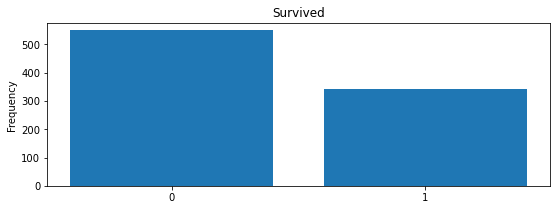

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


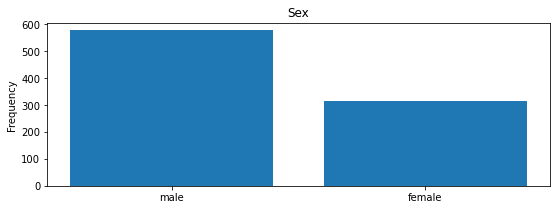

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


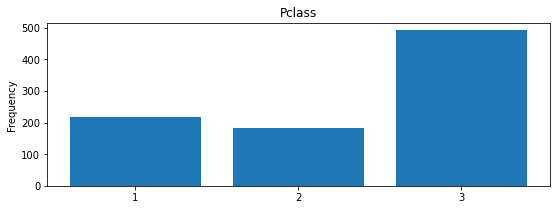

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


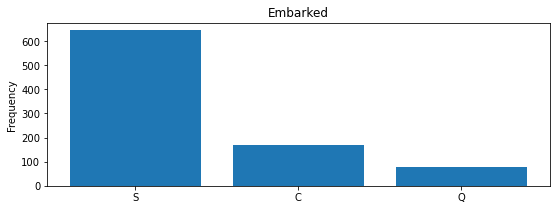

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


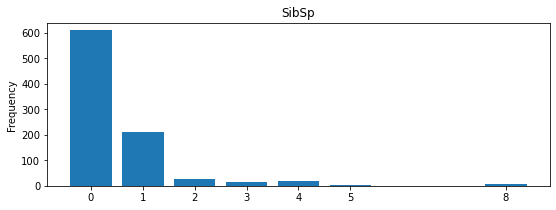

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


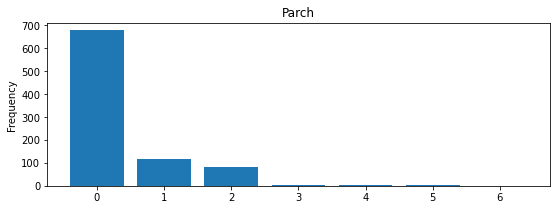

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
# moving on to remaining categorical variables
# unlike the ones so far,
# these can be confusing when visualized

category2=["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
A14            1
A10            1
A36            1
E63            1
B38            1
Name: Cabin, Length: 147, dtype: int64 

Berriman, Mr. William John         1
Peuchen, Major. Arthur Godfrey     1
Knight, Mr. Robert J               1
Harris, Mr. Walter                 1
Harder, Mr. George Achilles        1
                                  ..
Baumann, Mr. John D                1
Davies, Mr. Alfred J               1
Andrew, Mr. Edgardo Samuel         1
Widener, Mr. Harry Elkins          1
Sandstrom, Miss. Marguerite Rut    1
Name: Name, Length: 891, dtype: int64 

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
3101264     1
36209       1
315097      1
315086      1
350050      1
Name: Ticket, Length: 681, dtype: int64 



<a id = "5"></a>

## Numerical Variables

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins =  80)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

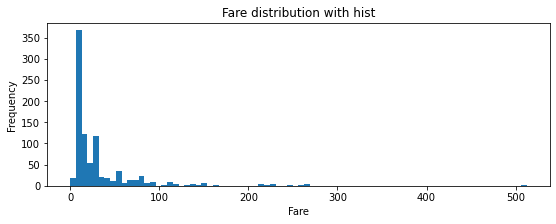

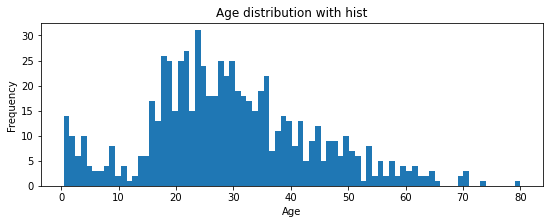

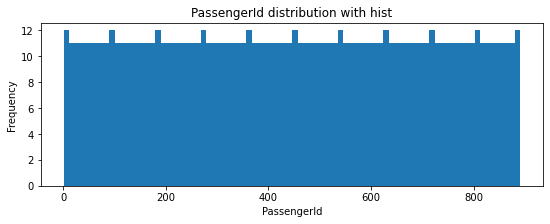

In [11]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a>

## 3. Basic Data Analysis

In this part, I will analyse the relationship between certain features vs 'Survived' to see what are the chances of survival for passengers with different features in our data.

In [12]:
# correlation between features

train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


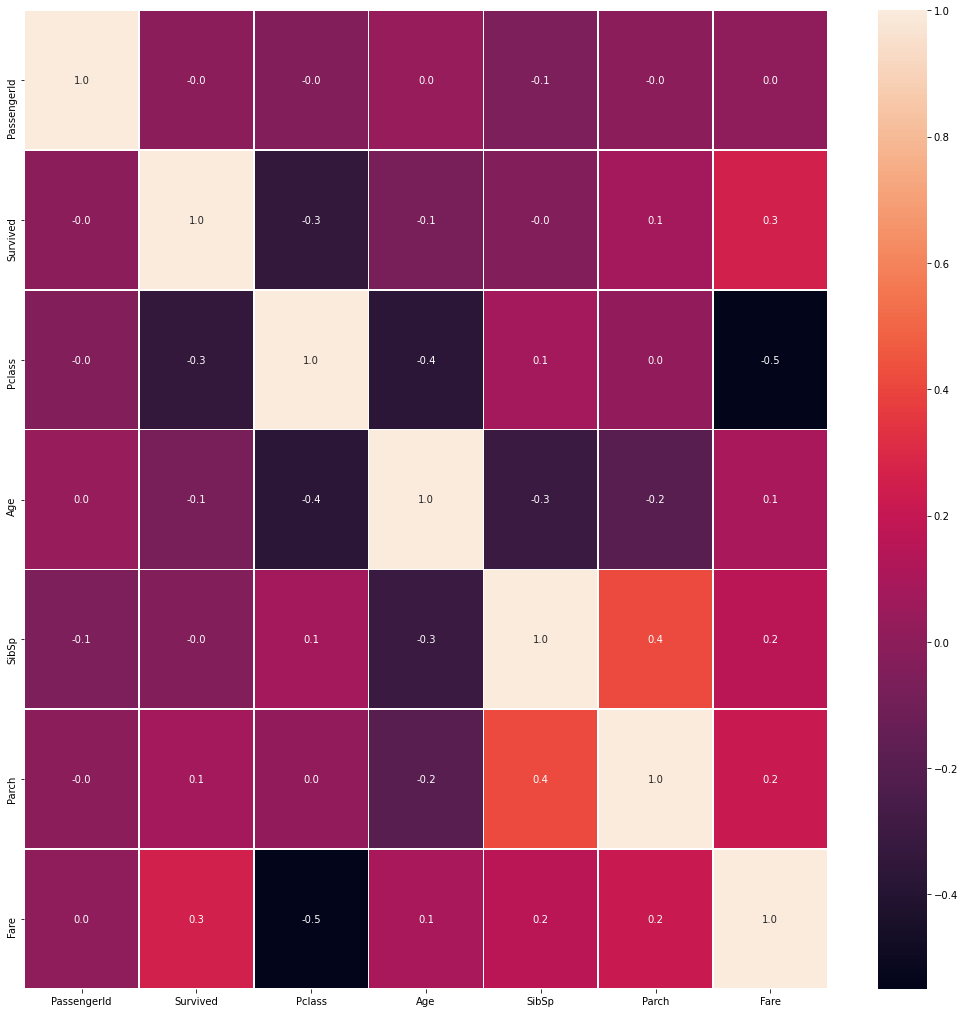

In [13]:
# heatmap of correlation

f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(train_df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [14]:
# Pclass vs Survived

train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [15]:
# Pclass vs Survived

train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
# Sex vs Survived

train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
# SibSp vs Survived

train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
# Parch vs Survived

train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [19]:
# the chances of females who had SibSp amounts of siblings or spouses surviving

train_df[["SibSp", "Sex","Survived"]].groupby(["SibSp", "Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Sex,Survived
0,0,female,0.787356
4,2,female,0.769231
2,1,female,0.754717
6,3,female,0.363636
8,4,female,0.333333
3,1,male,0.310680
5,2,male,0.200000
1,0,male,0.168203
9,4,male,0.083333
7,3,male,0.000000


<a id = "7"></a>
# 4. Outlier Detection

In this part, I will demonstrate how to detect and eliminate outliers in our data.

In [20]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        
        # 1st quartile:
        
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile:
        
        Q3 = np.percentile(df[c],75)
        
        # IQR:
        
        IQR = Q3 - Q1
        
        # Outlier step:
        
        outlier_step = IQR * 1.5
        
        # detect outlier and their indices:
        
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        # store indices:
        
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [21]:
train_df.loc[detect_outliers(train_df,["Age", "SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
# dropping outliers

train_df = train_df.drop(detect_outliers(train_df,["Age", "SibSp","Parch","Fare"]), axis = 0).reset_index(drop=True)

<a id = "8"></a>

## 5.Missing Values

In [23]:
train_df_len = len(train_df)

train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

<a id = "9"></a>
## Finding Missing Values

In [24]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [25]:
# these values are normal because of the concatenation

train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a>
## Filling Missing Values In

In [26]:
train_df["Embarked"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1294    False
1295    False
1296    False
1297    False
1298    False
Name: Embarked, Length: 1299, dtype: bool

In [27]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

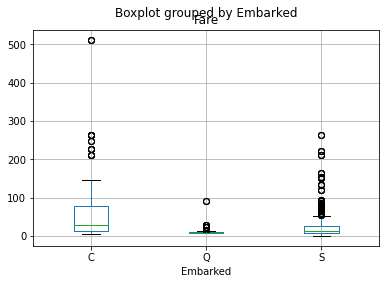

In [28]:
train_df.boxplot(column="Fare",by = "Embarked")

In [29]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [30]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [33]:
# how much these passengers have paid

third_class_price = train_df[train_df["Pclass"] ==3]["Fare"]
third_class_price

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [34]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a>
# 6. Visualization

Starting with correlation, we will visualize the data.

<a id = "12"></a>
# Correlation

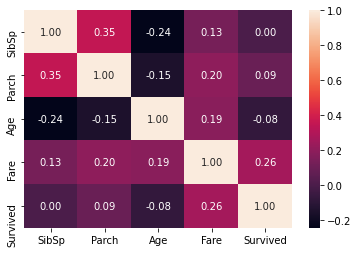

In [35]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt = ".2f")
plt.show()

The highest values in this correlation matrix are 0.41 and 0.26, which indicate that:

Parent&Children <---> Sibling&Spouse

Fare <---> Survived

both have a correlation

<a id = "13"></a>
# "SibSp" and "Survived"

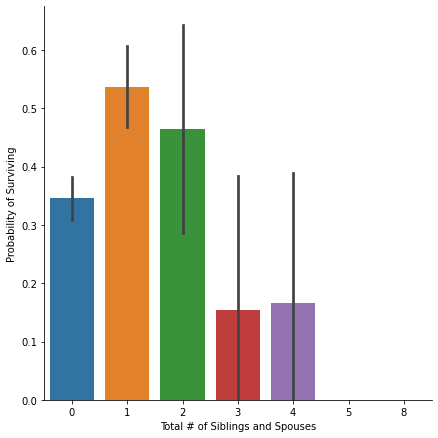

In [36]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Probability of Surviving")
g.set_xlabels("Total # of Siblings and Spouses")
plt.show()

More siblings and/or spouses mean less chance of surviving.

<a id = "14"></a>
# "ParCh" and "Survived"

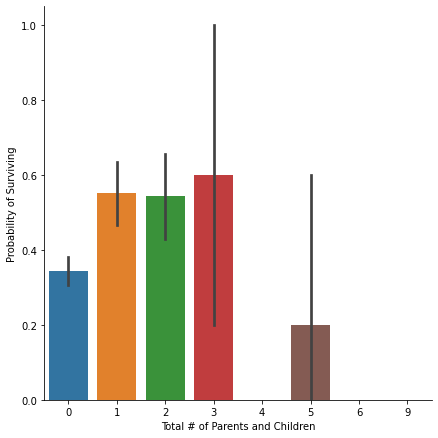

In [37]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Probability of Surviving")
g.set_xlabels("Total # of Parents and Children")
plt.show()

<a id = "15"></a>
# "PClass" and "Survived"

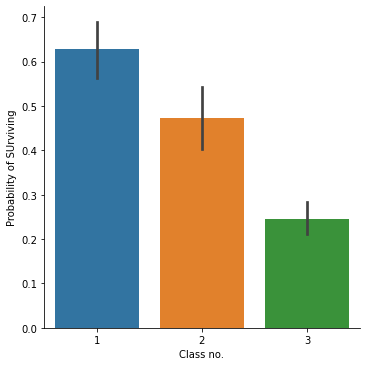

In [38]:
g = sns.factorplot(x="Pclass", y ="Survived", data = train_df, kind = "bar", size = 5)
g.set_ylabels("Probability of SUrviving")
g.set_xlabels("Class no.")

<a id = "16"></a>
# "Age" and "Survived"

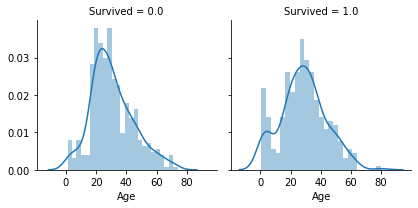

In [39]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

<a id = "17"></a>
# "PClass", "Age" and "Survived"

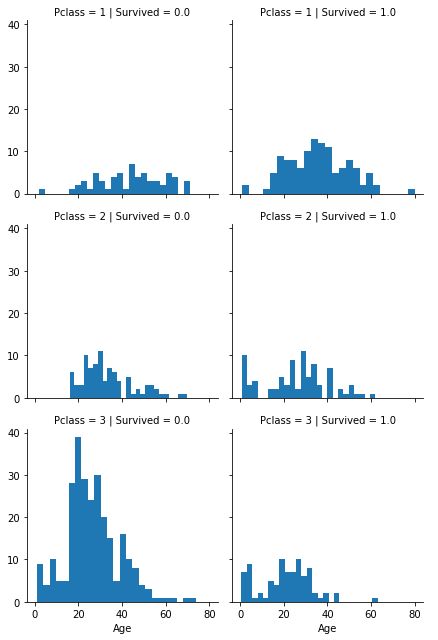

In [40]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

The reverse relationship between being a higher class passenger and having a chance of survival is apparent

<a id = "18"></a>
# "Embarked", "PClass" and "Survived"

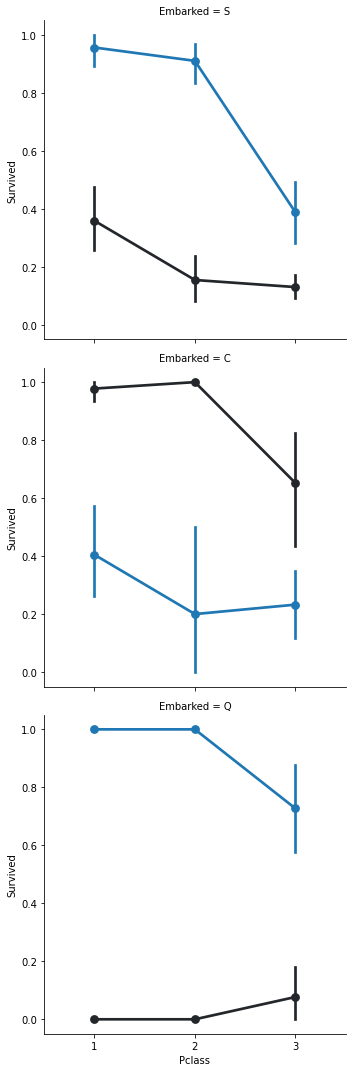

In [41]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 5)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
plt.show()
g.add_legend()

<a id = "19"></a>
# "Embarked", "Sex", "Fare" and "Survived"

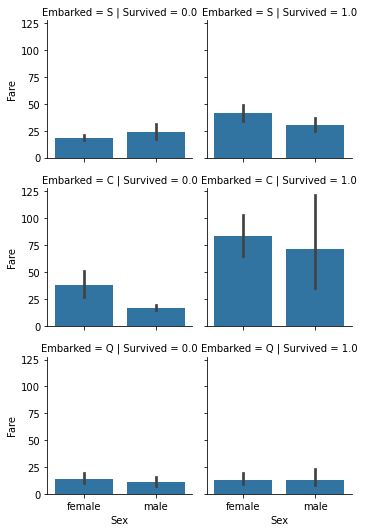

In [42]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.5)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

We can see that higher fare means higher chance of survival.

<a id = "20"></a>
# 7.Filling Missing Age Values

In [43]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


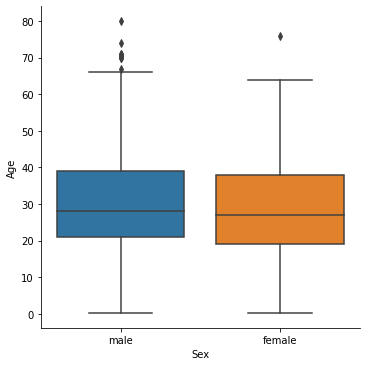

In [44]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")

We can deduce that sex is not informative in filling missing age values, since the medians are very close for each sex.

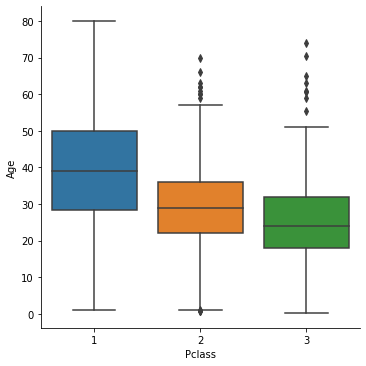

In [45]:
sns.factorplot(x = "Pclass", y = "Age", data = train_df, kind = "box")

ages of passengers are higher as classes of passengers go from 3 to 2 to 1.

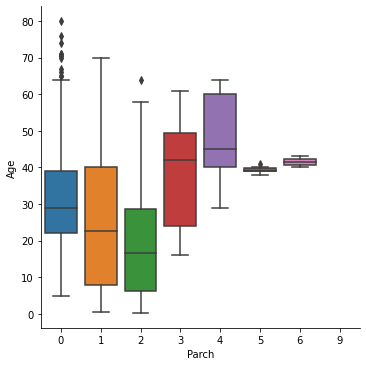

In [46]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")

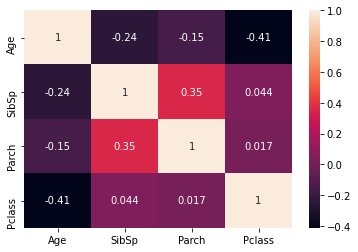

In [47]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

No "Sex" feature in this heatmap since its categorical, we want to correct that.

In [48]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

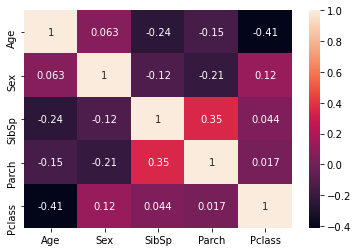

In [49]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

In [50]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [51]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "21"></a>
# 8.Feature Engineering

<a id = "22"></a>
## Name and Title

In [52]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [53]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

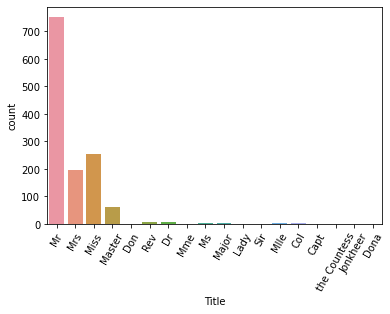

In [54]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [55]:
train_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [56]:
# convert to categorical

train_df["Title"] = train_df["Title"].replace(["Dr",'Don','Rev','Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'], "Other")

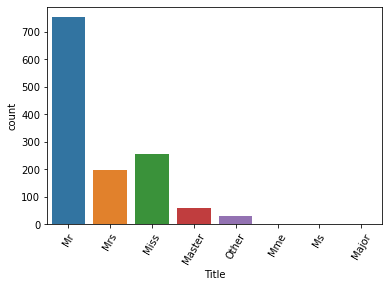

In [57]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [58]:
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Mrs" or i == "Mme" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

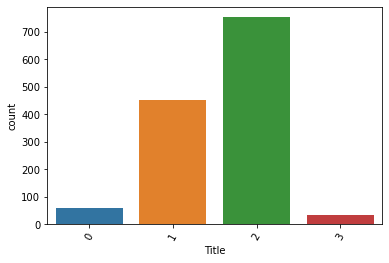

In [59]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

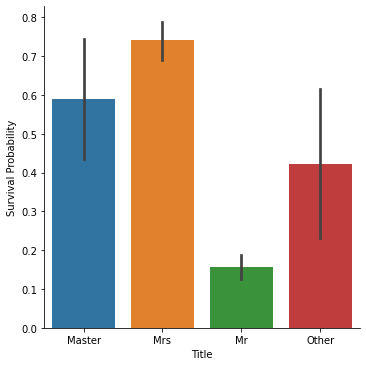

In [60]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [61]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [63]:
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "23"></a>
## Family Size

In [64]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


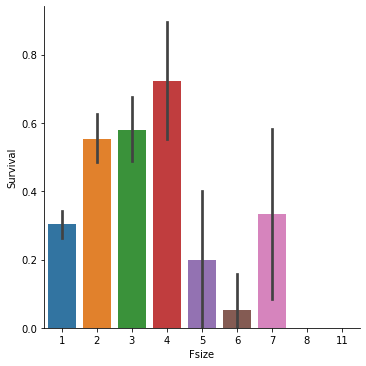

In [65]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [66]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [67]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


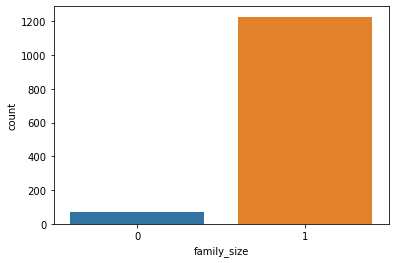

In [68]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

In [69]:
# therefore, big families have less chance of survival

In [70]:
train_df = pd.get_dummies(train_df, columns = ["family_size"])

In [71]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,0,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,1,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,0,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,0,1


<a id = "24"></a>
## Embarked

In [72]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

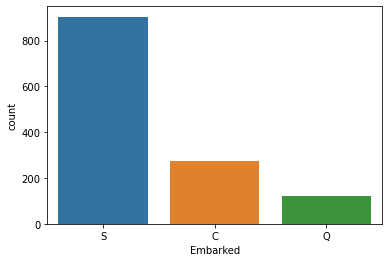

In [73]:
sns.countplot(x = "Embarked", data = train_df)

In [74]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"])

In [75]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,0,0,1,0,1,0,1,0,1,0
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,0,0,1,0,1,0,1,0,0,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,1,0,0,0,5,1,0,0,0,1
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,0,1,0,0,3,0,1,0,0,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,0,1,0,0,2,0,1,1,0,0


<a id = "25"></a>
## Ticket

In [76]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [77]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
         tickets.append("X")
train_df["Ticket"] = tickets

In [78]:
# making tickets categorical

train_df = pd.get_dummies(train_df, columns = ["Ticket"], prefix = "T")


In [79]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,1,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,1,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,1,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,0,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "26"></a>
## Pclass

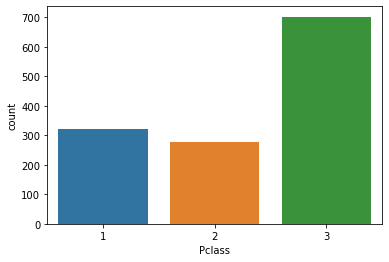

In [80]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [81]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Pclass"])

In [82]:
train_df.head(10)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1
5,6,0.0,1,25.0,0,0,8.4583,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1
6,7,0.0,1,54.0,0,0,51.8625,E46,0,0,...,0,0,0,0,0,0,1,1,0,0
7,8,0.0,1,2.0,3,1,21.0750,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1
8,9,1.0,0,27.0,0,2,11.1333,NaN,0,1,...,0,0,0,0,0,0,1,0,0,1
9,10,1.0,0,14.0,1,0,30.0708,NaN,0,1,...,0,0,0,0,0,0,1,0,1,0


<a id = "27"></a>
## Sex

In [83]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Sex"])

In [84]:
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a>
## Dropping Passenger ID & Cabin 

In [85]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

<a id = "29"></a>
# 9.Modelling

In [86]:
train_df

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,25.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1295,NaN,39.0,0,0,108.9000,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
1296,NaN,38.5,0,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1297,NaN,25.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


In [87]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "30"></a>
## Train Test Split

In [88]:
train_df_len

881

In [89]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [90]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [91]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 0)

In [92]:
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id = "31"></a>
## Simple Logistic Regression

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 84.41
Testing Accuracy: % 80.41


<a id = "32"></a>
## Hyperparameter Tuning, Grid Search & Cross Validation

We will compare 5 classifier methods & evaluate them
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [94]:
random_state = 40
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [95]:
# grid search

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8338983050847458
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8135593220338982
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8389830508474576
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8372881355932202
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.794915254237288


In [96]:
# create a seaborn to visualize results

Text(0.5, 1.0, 'Cross Validation Scores')

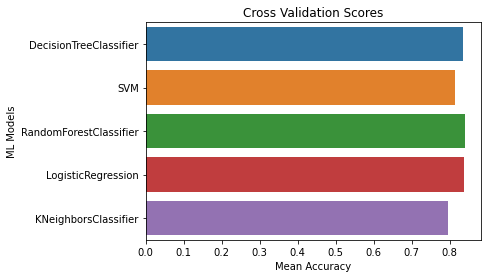

In [97]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33"></a>
## Ensemble Modelling

In [98]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8109965635738832


<a id = "34"></a>
# 10.Prediction & Submission

In [99]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

### Citation:
DATAI Team's tutorial has been helpful in helping me create this. 